In [1]:
import numpy as np
import matplotlib.pyplot as plt

from copy import deepcopy
from data import exemplars, load_noisy_data

# Visualize Data

### Inspect exemplars

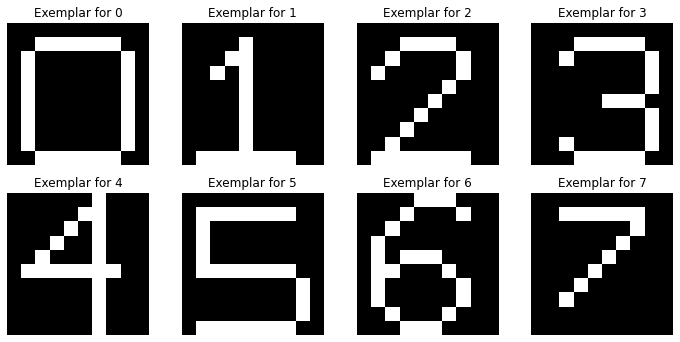

In [2]:
plt.figure(1, figsize=(12,12))
for i in range(len(exemplars)):
    exemplar = exemplars[i].reshape(10, 10)
    plt.subplot(4, 4, i+1)
    plt.imshow(exemplar, cmap='gray')
    plt.title(f'Exemplar for {i}')
    plt.axis('off')

### Inspect noisy data

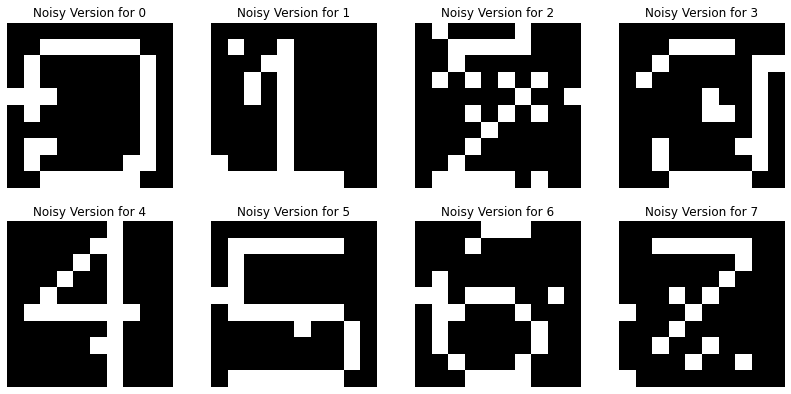

In [4]:
noisy_data = load_noisy_data(threshold=0.95)

plt.figure(1, figsize=(14,14))
for i in range(len(noisy_data)):
    noisy = noisy_data[i].reshape(10, 10)
    plt.subplot(4, 4, i+1)
    plt.title(f'Noisy Version for {i}')
    plt.imshow(noisy, cmap='gray')
    plt.axis('off')

# Create Hopfield Network

In [63]:
class HopfieldNetwork:
    def __init__(self, n=100):
        self.n = n
        self.W = np.zeros((n, n))

    def train(self, exemplars):
        for exemplar in exemplars:
            W_delta = np.subtract(np.outer(exemplar, exemplar.T), np.identity(self.n))
            self.W = np.add(self.W, W_delta)
        
    def hard_limiting(self, x):
        return 1 if x >= 0 else -1

    def asynchronous_update(self, input):        
        new_input = deepcopy(input)
        for i in range(self.n):
            new_input[i] = self.hard_limiting(np.inner(self.W[i], new_input))
        
        return new_input

    def recall(self, input, iters=10):
        new_input = deepcopy(input)
        for _ in range(iters):
            new_input = self.asynchronous_update(new_input)
                    
        return new_input

In [64]:
# Unit Testing
lecture_exemplars = [
    np.array([
        [ 1, -1, -1],
        [-1,  1, -1],
        [-1, -1,  1]
    ]).flatten(),
    np.array([
        [-1, -1, -1],
        [ 1,  1,  1],
        [-1, -1, -1]
    ]).flatten(),
    np.array([
        [-1, -1,  1],
        [-1, -1,  1],
        [-1, -1,  1]
    ]).flatten()
]
test_size = 9
test_hn = HopfieldNetwork(test_size)

test_hn.train([lecture_exemplars[0]])
assert np.array_equal(test_hn.W, [
    [ 0., -1., -1., -1.,  1., -1., -1., -1.,  1.],
    [-1.,  0.,  1.,  1., -1.,  1.,  1.,  1., -1.],
    [-1.,  1.,  0.,  1., -1.,  1.,  1.,  1., -1.],
    [-1.,  1.,  1.,  0., -1.,  1.,  1.,  1., -1.],
    [ 1., -1., -1., -1.,  0., -1., -1., -1.,  1.],
    [-1.,  1.,  1.,  1., -1.,  0.,  1.,  1., -1.],
    [-1.,  1.,  1.,  1., -1.,  1.,  0.,  1., -1.],
    [-1.,  1.,  1.,  1., -1.,  1.,  1.,  0., -1.],
    [ 1., -1., -1., -1.,  1., -1., -1., -1.,  0.]
])

test_hn.train([lecture_exemplars[1]])
assert np.array_equal(test_hn.W, [
    [ 0.,  0.,  0., -2.,  0., -2.,  0.,  0.,  2.],
    [ 0.,  0.,  2.,  0., -2.,  0.,  2.,  2.,  0.],
    [ 0.,  2.,  0.,  0., -2.,  0.,  2.,  2.,  0.],
    [-2.,  0.,  0.,  0.,  0.,  2.,  0.,  0., -2.],
    [ 0., -2., -2.,  0.,  0.,  0., -2., -2.,  0.],
    [-2.,  0.,  0.,  2.,  0.,  0.,  0.,  0., -2.],
    [ 0.,  2.,  2.,  0., -2.,  0.,  0.,  2.,  0.],
    [ 0.,  2.,  2.,  0., -2.,  0.,  2.,  0.,  0.],
    [ 2.,  0.,  0., -2.,  0., -2.,  0.,  0.,  0.]
])

test_hn.train([lecture_exemplars[2]])
assert np.array_equal(test_hn.W, [
    [ 0.,  1., -1., -1.,  1., -3.,  1.,  1.,  1.],
    [ 1.,  0.,  1.,  1., -1., -1.,  3.,  3., -1.],
    [-1.,  1.,  0., -1., -3.,  1.,  1.,  1.,  1.],
    [-1.,  1., -1.,  0.,  1.,  1.,  1.,  1., -3.],
    [ 1., -1., -3.,  1.,  0., -1., -1., -1., -1.],
    [-3., -1.,  1.,  1., -1.,  0., -1., -1., -1.],
    [ 1.,  3.,  1.,  1., -1., -1.,  0.,  3., -1.],
    [ 1.,  3.,  1.,  1., -1., -1.,  3.,  0., -1.],
    [ 1., -1.,  1., -3., -1., -1., -1., -1.,  0.]
])

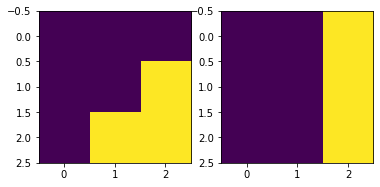

In [65]:
test_hn = HopfieldNetwork(test_size)
test_hn.train(lecture_exemplars)
test_noisy = np.array([
    [-1, -1, -1],
    [-1, -1,  1],
    [-1,  1,  1]
]).flatten()

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(test_noisy.reshape(3, 3))
plt.subplot(1, 2, 2)
plt.imshow(test_hn.recall(test_noisy, iters=2).reshape(3, 3))

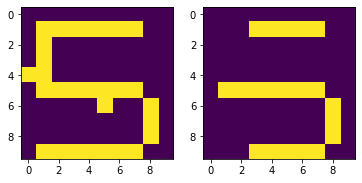

In [66]:
hn = HopfieldNetwork(100)
hn.train(exemplars[3:6])

test_image = noisy_data[5]

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(test_image.reshape(10, 10))
plt.subplot(1, 2, 2)
plt.imshow(hn.recall(test_image, iters=3).reshape(10, 10))